In [1]:
import seaborn as sns
sns.set_palette('colorblind')

import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append('../')

from library_analyzer import Library

In [2]:
replicates = {'lib3_rep1':['P0_Rep1','P10_Rep1'],
              'lib3_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'RFQDNPKPSSEEISMIAEQLSMEKEVVRVWFCNRRQKEKRINCPVATPIKPPVYN'
id_cols = ['ID']
process_call = 'ID'
data_file = './Library_3.xlsx'
sheet_name = 'Original_Data'

mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'



aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

# colorscheme = 'RdBu'
WT_color = 'xkcd:violet'

sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
to_red_cmap = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)



In [3]:
lib = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)



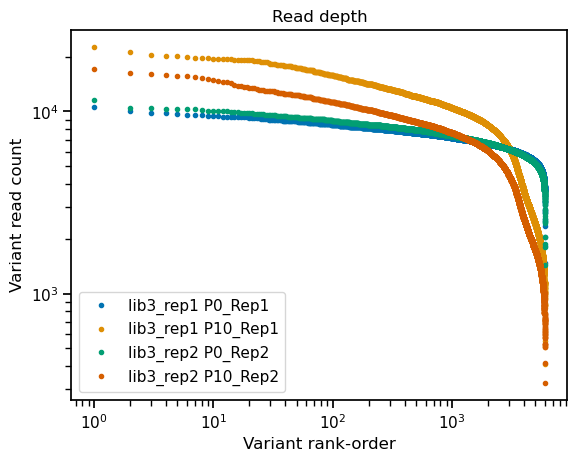

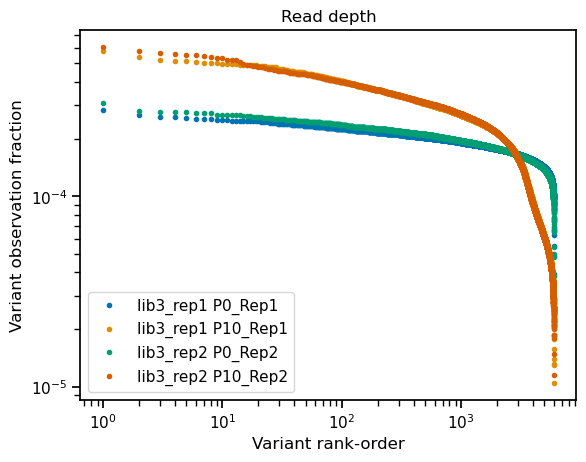

In [4]:
lib.check_depth()
plt.show()

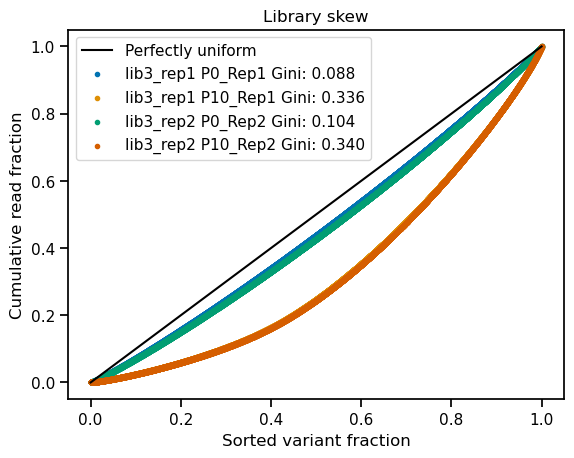

In [5]:
lib.check_skew()
plt.show()

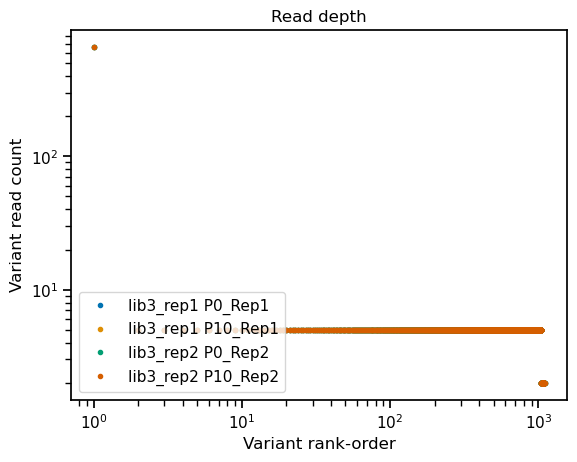

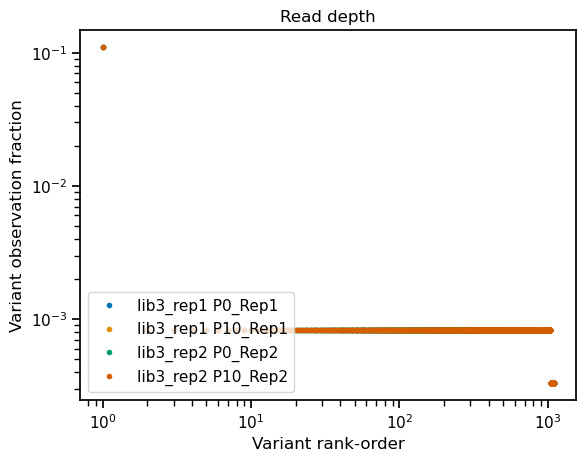

In [6]:
lib.check_barcode_distribution_depth()
plt.show()

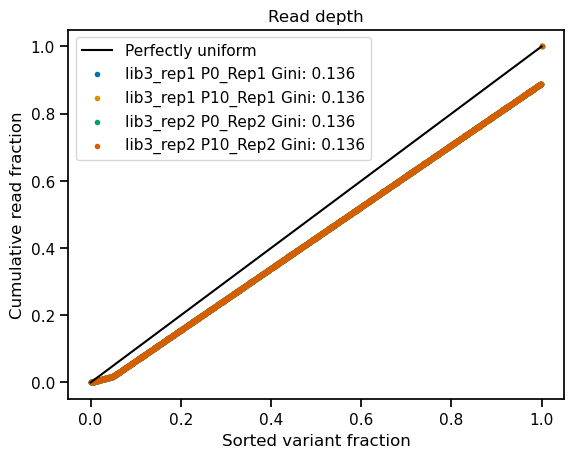

In [7]:
lib.check_barcode_distribution_skew()
plt.show()

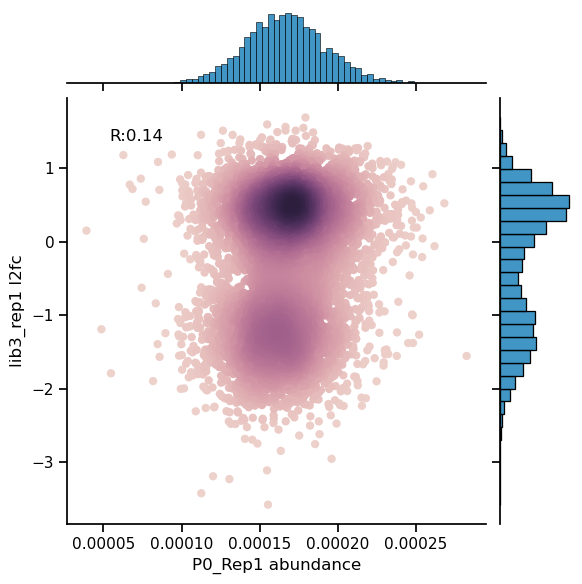

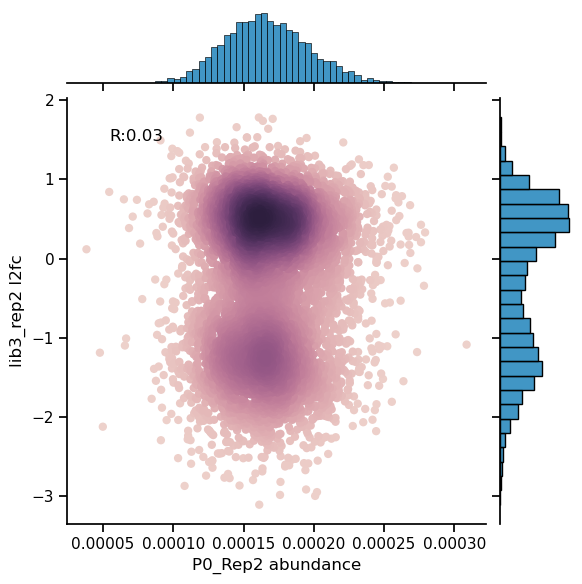

In [8]:
lib.make_initial_skew_checks()
plt.show()

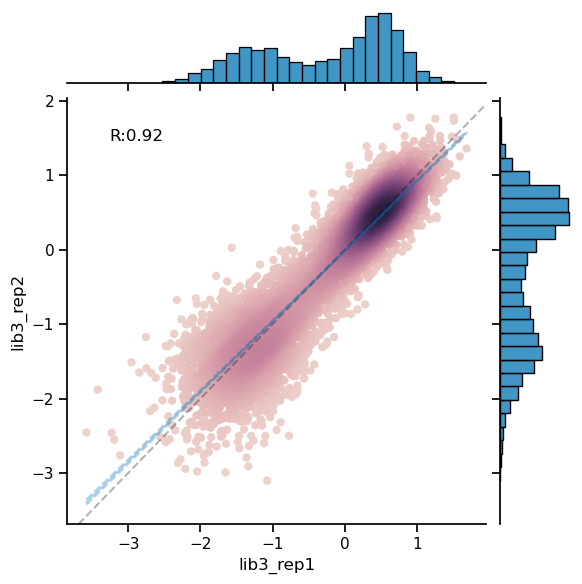

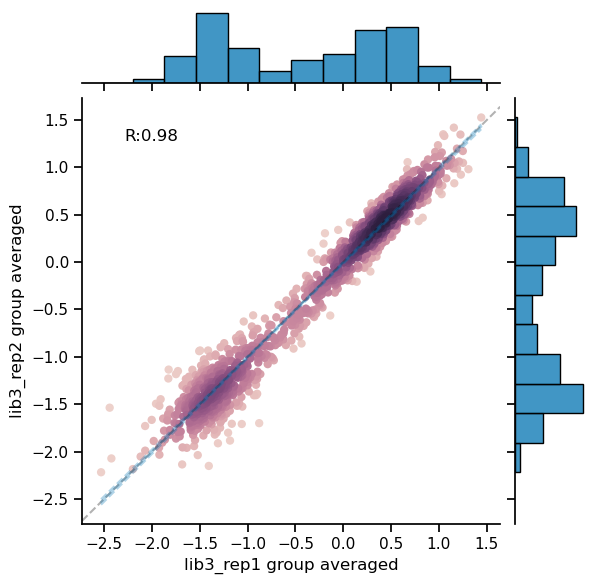

In [9]:
lib.make_replicate_checks()
plt.show()

Number of true positives: 665
lib3_rep1 The optimal threshold range is from 0.02452407157724279 to 0.029030771064226357
The ROCs at specific thresholds are- opt min: [0.9683527], opt max: [0.9683527]
The TPRs at specific thresholds are- opt min: [0.97744361], opt max: [0.97744361]
The FPRs at specific thresholds are- opt min: [0.00909091], opt max: [0.00909091]
The optimal f-score threshold range is from -0.1016635140582971 to -0.1016635140582971
The optimal g-mean threshold range is from -0.1016635140582971 to -0.1016635140582971
lib3_rep2 The optimal threshold range is from 0.006198714451002285 to 0.017593117035132888
The ROCs at specific thresholds are- opt min: [0.98038278], opt max: [0.98038278]
The TPRs at specific thresholds are- opt min: [0.98947368], opt max: [0.98947368]
The FPRs at specific thresholds are- opt min: [0.00909091], opt max: [0.00909091]
The optimal f-score threshold range is from -0.263468813373422 to -0.19130426367392817
The optimal g-mean threshold range is f

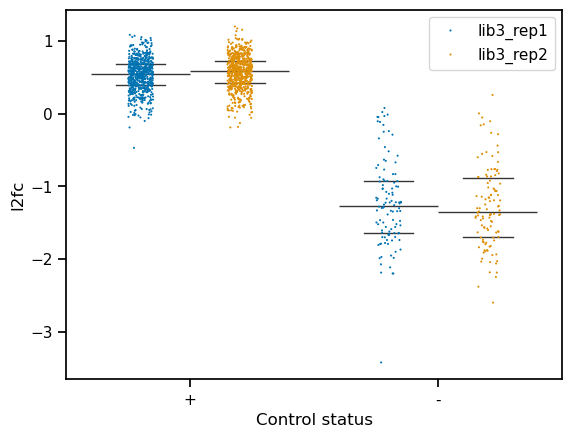

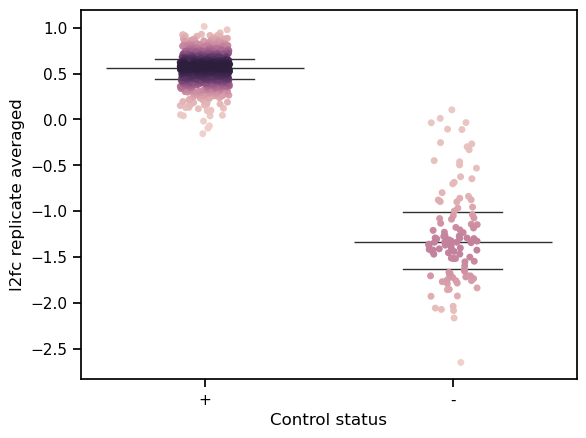

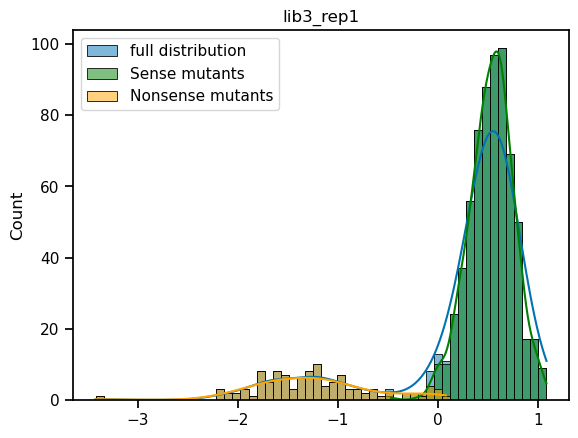

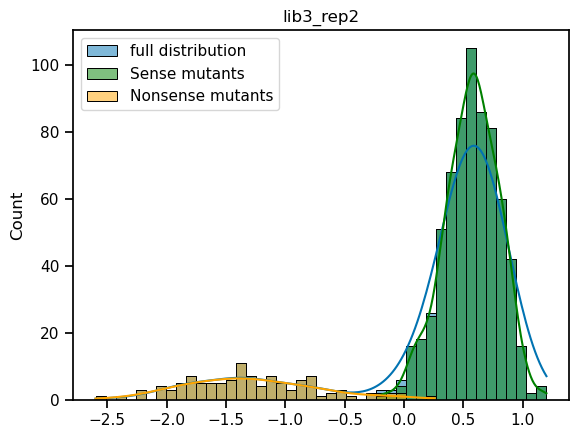

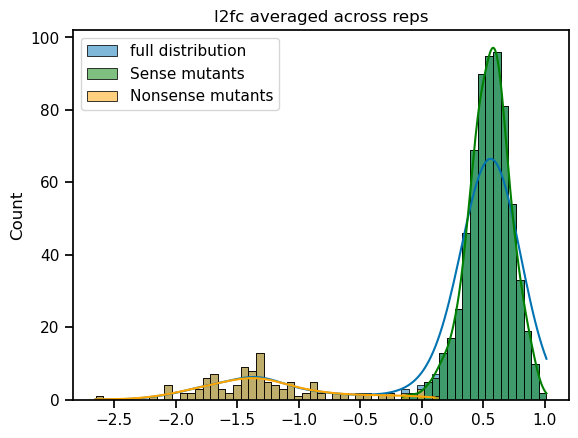

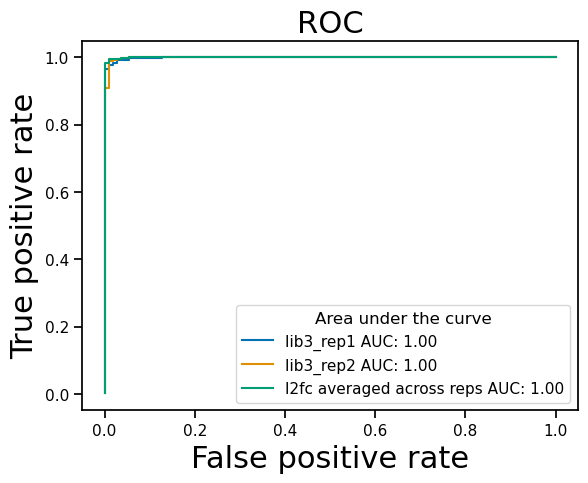

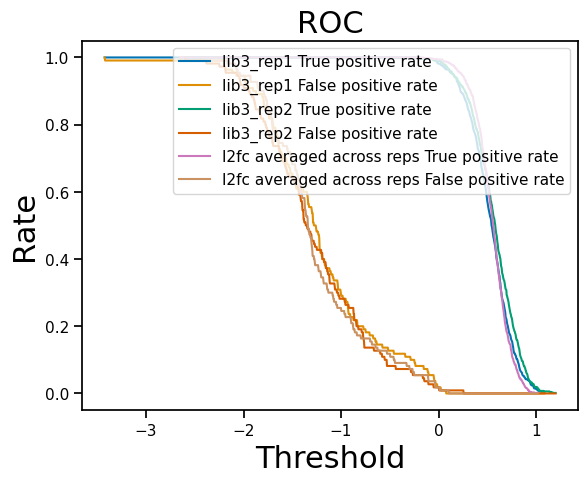

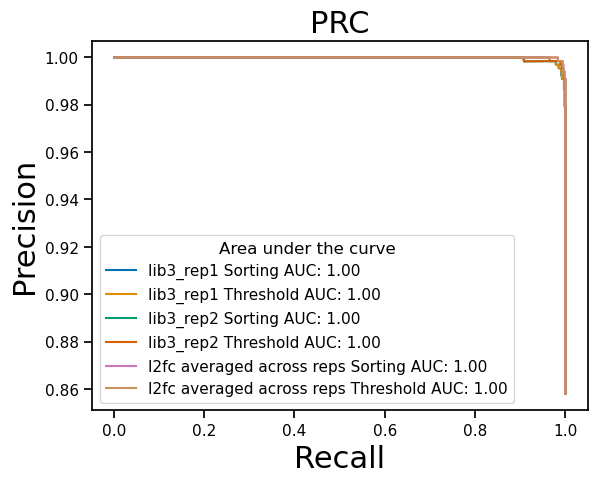

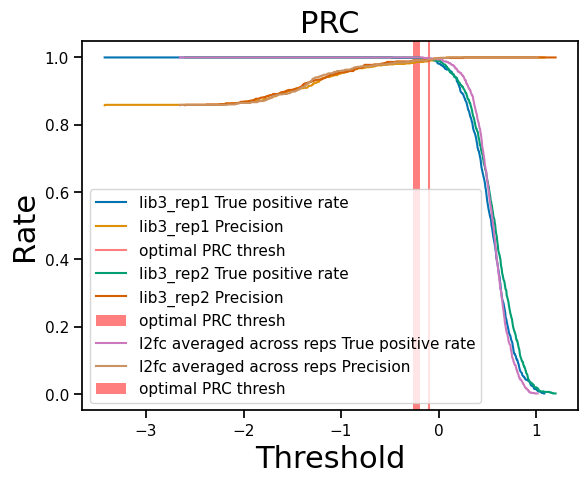

In [10]:
lib.check_controls(control_column, positive_values, negative_values)
plt.show()

In [11]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)


plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()


# Plotting the replicate heatmaps seperately

In [12]:
lib_rep1 = Library.build_from_reads(data_file, {'lib3_rep1':['P0_Rep1','P10_Rep1']}, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)




from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)


plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib_rep1.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()


In [13]:

lib_rep2 = Library.build_from_reads(data_file, {'lib3_rep2':['P0_Rep2','P10_Rep2']}, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)




from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)


plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib_rep2.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()
